In [1]:
import numpy as np
from scipy.spatial import distance
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sin, cos, atan2, pi
import sys
import scipy
from sklearn.metrics import pairwise_distances_argmin_min

In [2]:
#Function that constructs the list C of estimated point correspondences
def EstimateCorrespondences(X,Y,t,R,dmax):
    C = [] #Initialize empty set of correspondences
    X_TF = ((R@X.T)+t).T #Apply transformation to the X pointset
    
    #pairwise_distances_argmin_min() Function takes 2 set of data points. 
    #Referencing the entries of FIRST LIST and returns the array of 
    #shortest distance and index of point that corresponds to it in the second list 
    neighbours = pairwise_distances_argmin_min(X_TF, Y) 
    
    #for each correspondence checks the if the shortest distance is < dmax
    for i in range(len(X_TF)):
        if neighbours[1][i]<dmax:
            C.append((i, neighbours[0][i]))     
    return C

In [3]:
def ComputeOptimalRigidRegistration(X,Y,C):
    
    #Number of points in correspondences/number of points associated with eachother under dist<dmax
    K = len(C)
    
    #Create a list of X and Y point clouds that are included in correspondence C:
    Xassociated = []
    Yassociated = []
    for i, j in C:
        x = X[i]
        y = Y[j]
        Xassociated.append(x)
        Yassociated.append(y)
        
    #Calculate the point cloud centroids:
    x_centroid = sum(Xassociated)/K
    y_centroid = sum(Yassociated)/K
        
    #Calculate deviations of each point from the centroid of its pointcloud:
    #Xcentered  = Xassociated - x_centroid
    #Ycentered  = Yassociated - y_centroid
    
    #Calculate deviations of each point from the centroid of its pointcloud:
    Xcentered = X-x_centroid
    Ycentered = Y-y_centroid
    
    #Compute cross-covariance matrix W:
    W = np.zeros((3, 3))
    
    for i,j in C:
        x = Xcentered[i]
        y = Ycentered[j]
        W += y.reshape(3,1) @ x.reshape(1,3)
    
    #Compute singular value decomposition: W = UΣV'
    U, S, V_T = np.linalg.svd(W/K)
    
    #Construct optimal rotation:
    R = U@V_T
    
    #Recover optimal translation:
    t = y_centroid.reshape(3,1) - R@x_centroid.reshape(3,1)
    
    return R,t 

In [4]:
# ICP function
def ICP(X,Y,t0,R0,dmax,num_ICP_iters):
    #initialization
    t=t0
    R=R0
    for i in range (num_ICP_iters):
        C = EstimateCorrespondences(X,Y,t,R,dmax)
        R,t = ComputeOptimalRigidRegistration(X,Y,C)
    return t,R,C

In [5]:
# Creating the numpy array of the point clouds from the provided txt file
X = np.loadtxt(r"C:\Users\AVISH\Downloads\pclX.txt")
Y = np.loadtxt(r"C:\Users\AVISH\Downloads\pclY.txt")

#defining parameters
t0 = np.zeros((3,1))
R0 = np.eye(3)
dmax = 0.25
num_ICP_iters = 30

#Run ICP for num_ICP_iters times
tf,Rf,Cf=ICP(X,Y,t0,R0,dmax,num_ICP_iters)

In [6]:
# Final Rigid transformation
tf,Rf

(array([[ 0.49661487],
        [-0.29392971],
        [ 0.29645004]]),
 array([[ 0.95126601, -0.15043058, -0.26919069],
        [ 0.22323628,  0.9381636 ,  0.26460276],
        [ 0.21274056, -0.31180074,  0.92602471]]))

In [7]:
#Finding RMSE
distance_list = []
XX=((Rf@X.T)+tf).T
for i,j in Cf:
    distance=np.linalg.norm(Y[j]-XX[i])
    distance_list.append(distance**2)
RMSE=math.sqrt(sum(distance_list)/len(distance_list))
RMSE

0.008950576587683131

<IPython.core.display.Javascript object>


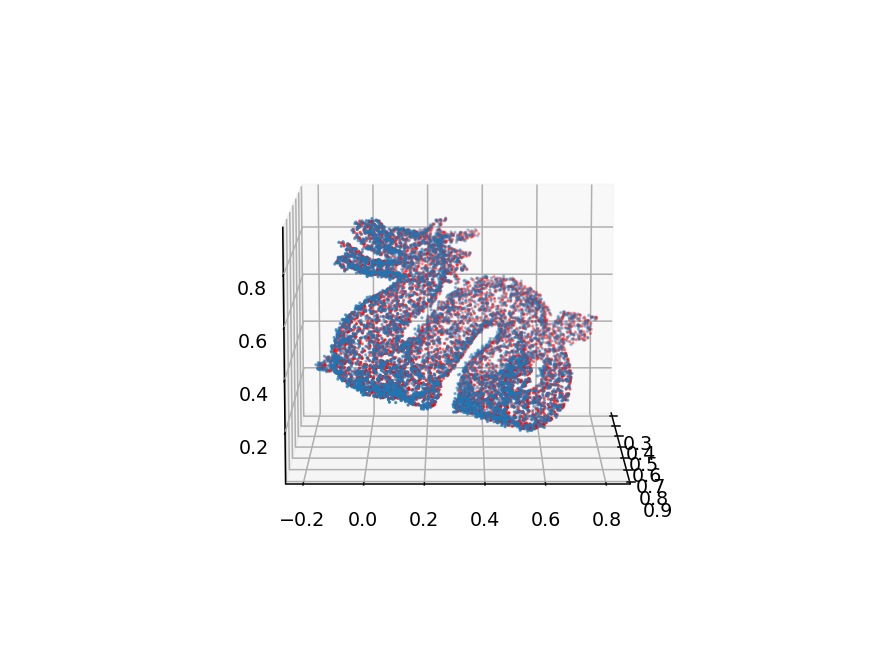

In [19]:
#Y and X(after transformation) plotted together
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#Y data
x1=Y[:,0]
y1=Y[:,1]
z1=Y[:,2]
#X data after applying tranformation
X_tran=((Rf@X.T)+tf).T
x2=X_tran[:,0]
y2=X_tran[:,1]
z2=X_tran[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1,y1,z1,s=0.5)
ax.scatter(x2,y2,z2,s=0.5,color = 'r')
ax.view_init(10,0)
plt.show()

In [20]:
# Y plot
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x=Y[:,0]
y=Y[:,1]
z=Y[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,s=0.5)
ax.view_init(10, 0)
plt.show()

<IPython.core.display.Javascript object>

In [21]:
# X plotted after applying transformation
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
XX=((Rf@X.T)+tf).T
x=XX[:,0]
y=XX[:,1]
z=XX[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,s=0.5,color = 'r')
ax.view_init(10, 0)
plt.show()

<IPython.core.display.Javascript object>

In [26]:
# X plotted before applying transformation
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Y data
x=Y[:,0]
y=Y[:,1]
z=Y[:,2]

#X data befor applying tranformation
x1=X[:,0]
y1=X[:,1]
z1=X[:,2]

#X data after applying tranformation
X_tran=((Rf@X.T)+tf).T
x2=X_tran[:,0]
y2=X_tran[:,1]
z2=X_tran[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,s=0.5)
ax.scatter(x1,y1,z1,s=0.5,color = 'g')
ax.scatter(x2,y2,z2,s=0.5,color = 'r')
ax.view_init(10,-70)
plt.show()

<IPython.core.display.Javascript object>